# Impl. 1: fair coin

Pregunta: Tengo una moneda "fair" y la lanzo muchas veces. Como se comporta la frecuencia relativa del resultado sale cara al aumentar los lanzamientos?

In [94]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

In [95]:
# 1. Simular lanzamiento de un dado equilibrado
# la librería clave es numpy
die_roll = np.random.randint(1,7)
die_roll

5

In [96]:
# 2. Simulo el lanzamiento de una moneda 10 veces
coin_flip = np.random.randint(0,2,10)
coin_flip

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1])

In [97]:
# 3. A partir de un lanzamiento, obtengo la frecuencia de caras (1)
def freq_flip(coin_flip):
    return sum(coin_flip)/len(coin_flip)

freq_flip(coin_flip)

0.9

In [98]:
# 4. Observo la frecuencia observada, pero para cada vez más lanzamientos

np.random.seed(0)
coin_flips = []
frequencies = []

for _ in range(1000):
    coin_flips.append(np.random.randint(0,2))
    frequencies.append(freq_flip(coin_flips))

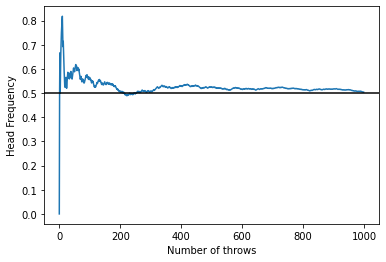

In [104]:
# 5. Grafico frecuencias
plt.plot(list(range(1000)),frequencies)
plt.axhline(y=0.5, color = "k")
plt.xlabel('Number of throws')
plt.ylabel('Head Frequency')
plt.show()

La clave acá es que la frecuencia relativa tiene al verdadero valor de probabilidad cuando n tiende a infinito.

# Impl. 2: simulación moneda cargada

In [105]:
# defino semilla
np.random.seed(0)

# defino: lanzo moneda 1 vez y me fijo el nro de exitos
coin_flip = np.random.binomial(1, 0.7)
print(coin_flip)

# defino: lanzo moneda 10 veces y me fijo el nro exitos
number_coin_flip = 10
np.random.binomial(number_coin_flip, 0.7)


1


6

# Impl. 3: Intervalos de confianza

**Problema**: se lanza una moneda N veces y se computa la frecuencia relativa de los exitos de los lanzamientos. Que nos dice esa frecuencia de p, la probabilidad de obtener cara en 1 lanzamiento?

1. Si miramos cada lanzamiento como un problema de Bernoulli (p), lo que es exacto por construcción, la pregunta tiene relación con esta P.

2. Tirar muchas veces la moneda y observar la frecuencia relativa de exitos $\bar{x}$ es un problema tratado por el LGN, que habla de la tendencia en probabilidad de la media de variables aleatorias al valor esperado de esta al aumentar la cantidad valores considerados. En este caso la frecuencia de éxitos tiende al valor de probabilidad $p$. Esto responde la pregunta. 

**Problema 2**: sabemos que la frecuencia relativa tiende a $p$, pero eso depende en su certeza de la cantidad de lanzamientos. Se puede establecer la certeza para una cantidad dada N de lanzamientos ?

In [106]:
# si lanzo mil veces, puedo obtener una frecuencia relativa cercana a 0.7
coin_flips = 1000
p_secreto = 0.7
np.random.binomial(coin_flips,p_secreto)/coin_flips

0.69

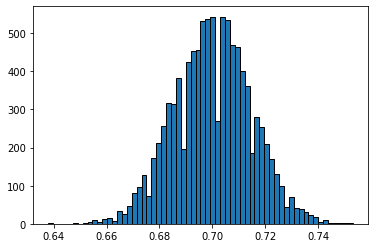

In [107]:
# la clave aquí es ver como se comporta ese promedio bajo las mismas condiciones.
# podría realizar el ejercicio muchas veces y ver como se comporta esa frecuencia.
# realizo el experimento 10000 veces.

nro_rep_exp = 10000
resultados = np.random.binomial(coin_flips, p_secreto, nro_rep_exp)/coin_flips

# grafico resultados
plt.hist(resultados,bins='auto', edgecolor='black')
plt.show()

# en los 10000 experimentos, la frecuencia relativa, como variable aleatoria, tiene una distribución.

[0.638      0.63985484 0.64170968 0.64356452 0.64541935 0.64727419
 0.64912903 0.65098387 0.65283871 0.65469355 0.65654839 0.65840323
 0.66025806 0.6621129  0.66396774 0.66582258 0.66767742 0.66953226
 0.6713871  0.67324194 0.67509677 0.67695161 0.67880645 0.68066129
 0.68251613 0.68437097 0.68622581 0.68808065 0.68993548 0.69179032
 0.69364516 0.6955     0.69735484 0.69920968 0.70106452 0.70291935
 0.70477419 0.70662903 0.70848387 0.71033871 0.71219355 0.71404839
 0.71590323 0.71775806 0.7196129  0.72146774 0.72332258 0.72517742
 0.72703226 0.7288871  0.73074194 0.73259677 0.73445161 0.73630645
 0.73816129 0.74001613 0.74187097 0.74372581 0.74558065 0.74743548
 0.74929032 0.75114516 0.753     ]
[  2.   0.   0.   0.   0.   1.   0.   2.   5.  11.   5.  13.  16.   7.
  33.  26.  47.  82.  96. 128.  74. 172. 213. 256. 317. 315. 381. 196.
 425. 453. 457. 533. 537. 543. 269. 542. 535. 470. 463. 400. 362. 186.
 281. 253. 209. 169. 130.  98.  45.  71.  41.  38.  31.  22.  17.   6.
   9.   1. 

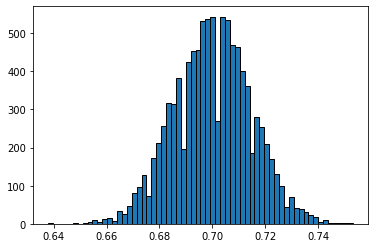

In [112]:
# miro bins y count de repeticiones
counts, bin_edges, _ = plt.hist(resultados,bins='auto', edgecolor='black')

print(bin_edges)
print(counts)

In [14]:
# observo metricas del histograma

def output_bin_coverage(i):
    count = int(counts[i])
    range_start, range_end = bin_edges[i], bin_edges[i+1]
    range_string = f"{range_start} - {range_end}"
    print((f"The bin for frequency range {range_string} contains "f"{count} element{'' if count == 1 else 's'}, equivalent to {round(count/nro_rep_exp*100,2)}% of data"))

for i in range(len(bin_edges)-1):
    output_bin_coverage(i)

The bin for frequency range 0.638 - 0.6398548387096774 contains 2 elements, equivalent to 0.02% of data
The bin for frequency range 0.6398548387096774 - 0.6417096774193548 contains 0 elements, equivalent to 0.0% of data
The bin for frequency range 0.6417096774193548 - 0.6435645161290323 contains 0 elements, equivalent to 0.0% of data
The bin for frequency range 0.6435645161290323 - 0.6454193548387097 contains 0 elements, equivalent to 0.0% of data
The bin for frequency range 0.6454193548387097 - 0.6472741935483871 contains 0 elements, equivalent to 0.0% of data
The bin for frequency range 0.6472741935483871 - 0.6491290322580645 contains 1 element, equivalent to 0.01% of data
The bin for frequency range 0.6491290322580645 - 0.6509838709677419 contains 0 elements, equivalent to 0.0% of data
The bin for frequency range 0.6509838709677419 - 0.6528387096774194 contains 2 elements, equivalent to 0.02% of data
The bin for frequency range 0.6528387096774194 - 0.6546935483870968 contains 5 elem

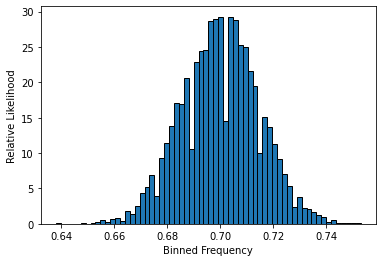

In [15]:
# determinación de likelihood
# likelihood, nombre aplicado al valor de y, en el caso de escalar los bins de manera que el histograma tenga area bajo la curva = 1
likelihoods, bin_edges, _ = plt.hist(resultados, bins='auto', edgecolor = 'black', density=True)
plt.xlabel('Binned Frequency')
plt.ylabel('Relative Likelihood')
plt.show()

In [16]:
# determino probabilidad de caer en el bin mas alto
bin_width = bin_edges[1] - bin_edges[0]
index = likelihoods.argmax()
area = likelihoods[index] * bin_width
range_start, range_end = bin_edges[index], bin_edges[index + 1]
range_string = '{:.4f} - {:.4f}'.format(range_start, range_end)
print('Interval: {} with prob: {:.4f}'.format(range_string, area))

Interval: 0.6992 - 0.7011 with prob: 0.0543


In [17]:
# esto me ofrece un intervalo de confianza, tomando 3 bins por ejemplo.
# con un ~ 13% de probabilidad, el verdadero valor de p cae dentro del intervalo 0.697-0.703
index = likelihoods.argmax()
start_index, end_index = index - 1, index + 1
area = likelihoods[start_index:end_index + 1].sum()*bin_width
range_start, range_end = bin_edges[start_index], bin_edges[end_index + 1]
range_string = '{:.4f} - {:.4f}'.format(range_start, range_end)
print('Interval: {} with prob: {:.4f}'.format(range_string, area))

# la pregunta es si esto es suficiente certeza para el objetivo buscado.

Interval: 0.6974 - 0.7029 with prob: 0.1349


In [18]:
# construcción iterativa de intervalo de confianza
index = likelihoods.argmax()
for i in range(1,20):
    start_index, end_index = index - i, index + i
    area = likelihoods[start_index:end_index+1].sum() * bin_width
    range_start, range_end = bin_edges[start_index], bin_edges[end_index + 1]
    range_string = '{:.4f} - {:.4f}'.format(range_start, range_end)
    print('Interval: {} with prob: {:.4f}'.format(range_string, area))

Interval: 0.6974 - 0.7029 with prob: 0.1349
Interval: 0.6955 - 0.7048 with prob: 0.2424
Interval: 0.6936 - 0.7066 with prob: 0.3416
Interval: 0.6918 - 0.7085 with prob: 0.4339
Interval: 0.6899 - 0.7103 with prob: 0.5227
Interval: 0.6881 - 0.7122 with prob: 0.5823
Interval: 0.6862 - 0.7140 with prob: 0.6566
Interval: 0.6844 - 0.7159 with prob: 0.7067
Interval: 0.6825 - 0.7178 with prob: 0.7665
Interval: 0.6807 - 0.7196 with prob: 0.8174
Interval: 0.6788 - 0.7215 with prob: 0.8596
Interval: 0.6770 - 0.7233 with prob: 0.8937
Interval: 0.6751 - 0.7252 with prob: 0.9141
Interval: 0.6732 - 0.7270 with prob: 0.9367
Interval: 0.6714 - 0.7289 with prob: 0.9508
Interval: 0.6695 - 0.7307 with prob: 0.9661
Interval: 0.6677 - 0.7326 with prob: 0.9749
Interval: 0.6658 - 0.7345 with prob: 0.9813
Interval: 0.6640 - 0.7363 with prob: 0.9877


En el resultado se observa que existe un 95% de probabilidad de que el verdadero valor de p caiga entre 0.67-0.72

Interval: 0.6860 - 0.7121 with prob: 0.9549


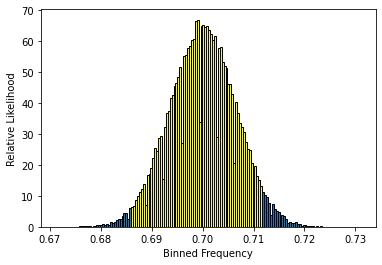

In [19]:
# repetición del ejercicio: nro. lanzamientos 5000, nro repeticiones del ejercicio: 100000
coin_flips = 5000
p_secreto = 0.7
nro_rep_exp = 100000
resultados = np.random.binomial(coin_flips, p_secreto, nro_rep_exp)/coin_flips

# grafico resultados
likelihoods, bin_edges, patches = plt.hist(resultados, bins='auto', edgecolor='black', density = True)


bin_width = bin_edges[1] - bin_edges[0]
index = likelihoods.argmax()
k = 34
start_index, end_index = index - k , index + k
area = likelihoods[start_index:end_index+1].sum() * bin_width
range_start, range_end = bin_edges[start_index], bin_edges[end_index + 1]
range_string = '{:.4f} - {:.4f}'.format(range_start, range_end)
print('Interval: {} with prob: {:.4f}'.format(range_string, area))

for i in range(start_index, end_index):
    patches[i].set_facecolor('yellow')

plt.xlabel('Binned Frequency')
plt.ylabel('Relative Likelihood')

plt.show()


In [20]:
# Es relevante ver que la función np.histogram me da likelihood y edges sin salida grafica!
# repetición del ejercicio: nro. lanzamientos 5000, nro repeticiones del ejercicio: 100000
coin_flips = 5000
p_secreto = 0.7
nro_rep_exp = 100000
resultados = np.random.binomial(coin_flips, p_secreto, nro_rep_exp)/coin_flips

# grafico resultados
likelihoods, bin_edges = np.histogram(resultados, bins='auto', density = True)


bin_width = bin_edges[1] - bin_edges[0]
index = likelihoods.argmax()
k = 34
start_index, end_index = index - k , index + k
area = likelihoods[start_index:end_index+1].sum() * bin_width
range_start, range_end = bin_edges[start_index], bin_edges[end_index + 1]
range_string = '{:.4f} - {:.4f}'.format(range_start, range_end)
print('Interval: {} with prob: {:.4f}'.format(range_string, area))

Interval: 0.6877 - 0.7138 with prob: 0.9552


# Implementación: juego de cartas

In [136]:
# Defino una situación: un mazo de cartas de cartas rojas y negras, en proporción desconocida cada uno.
#np.random.seed(33)
total_cards = 52
red_card_count = np.random.randint(0,total_cards)
black_card_count = total_cards - red_card_count
assert red_card_count != black_card_count

In [137]:
# 1. Definicion de sample space (caso no equiprobable)
weighted_sample_space = {'red_card':red_card_count, 'black_card':black_card_count}

# 2. computo probabilidad
def get_matching_event(event_condition, sample_space):
    return set([outcome for outcome in sample_space if event_condition(outcome)])

def compute_prob(event_condition, sample_space):
    event = get_matching_event(event_condition, sample_space)

    if type(sample_space) == type(set()):
        return len(event)/len(sample_space)

    else:
        event_size = sum([sample_space[outcome] for outcome in event])
        total_repetitions = sum(sample_space.values())
        return event_size/total_repetitions

prob_red = compute_prob(lambda x: x == 'red_card', weighted_sample_space)

In [138]:
#np.random.seed(10)
color = 'red' if np.random.binomial(1, prob_red) else 'black'
print('El color de la primera carta es {}'.format(color))

El color de la primera carta es black


In [139]:
#np.random.seed(10)
red_count = np.random.binomial(10, prob_red)
print('En 10 extracciones de la primera carta {} veces salió roja'.format(red_count))

En 10 extracciones de la primera carta 3 veces salió roja


In [140]:
# comienzo con la simulación en cuanto tal. Realizo ejercicio 50000 veces y computo frecuencia de rojas
# esto lo hago 100000 veces
# miro intervalo al 95%

#np.random.seed(12)
red_card_count_array = np.random.binomial(50000, prob_red, 100000)
frequency_array = red_card_count_array/50000

likelihoods, bin_edges = np.histogram(frequency_array, bins='auto', density=True)

bin_width = bin_edges[1] - bin_edges[0]

index = likelihoods.argmax()
k = 33
start_index, end_index = index - k , index + k
area = likelihoods[start_index:end_index+1].sum() * bin_width
range_start, range_end = bin_edges[start_index], bin_edges[end_index + 1]
range_string = '{:.4f} - {:.4f}'.format(range_start, range_end)
print('Interval: {} with prob: {:.4f}'.format(range_string, area))


Interval: 0.3227 - 0.3308 with prob: 0.9457


In [141]:
# se observa el intervalo en términos de cantidad de rojas
round(range_start * 52), round(range_end * 52)

(17, 17)

In [142]:
# se verifica que existe justamente la cantidad de rojas
red_card_count

17